In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv("/content/Mall_Customers (1).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
display("duplicated:",df.duplicated().sum())

'duplicated:'

0

In [5]:
X= df.iloc[:, [3,4]].values

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

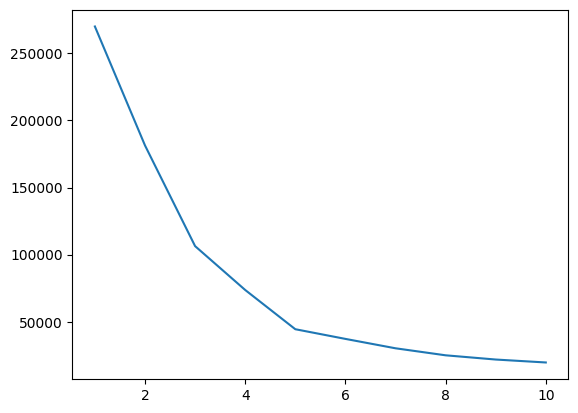

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [9]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


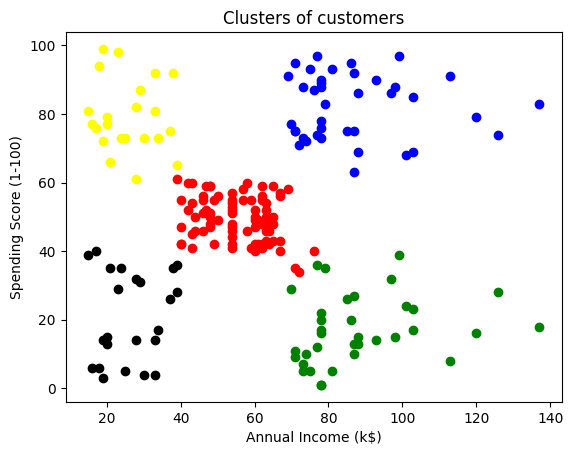

In [10]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
df["Target"]=y_means

In [12]:
Clustered_df=df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [13]:
X=Clustered_df.iloc[:,1:5]
y=Clustered_df.iloc[:,-1]

In [14]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
y.head()

0    4
1    3
2    4
3    3
4    4
Name: Target, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
le=LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [21]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [22]:
gbdt.fit(X_train,y_train)
y_pred=gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

In [23]:
y_pred=gbdt.predict(X_test)
y_pred

array([1, 3, 4, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 4,
       2, 1, 1, 1, 1, 1, 0, 1, 3, 4, 1, 1, 2, 1, 0, 0, 2, 1], dtype=int32)

In [24]:
prediction = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred})

# Print the DataFrame
display(prediction)

,Original Value,Predicted Value
95,1,1
15,3,3
30,4,4
158,2,2
128,2,2
115,1,1
69,1,1
170,2,2
174,2,2
45,3,1
